In [1]:
%matplotlib inline
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

# List of available RBFs

## Splines

#### `biharmonic2d`

$$
\phi(r) = \begin{cases}
  0 & r = 0 \\
  c r^2 \ln r & \mathrm{otherwise}
 \end{cases}
$$

$\phi(\|\cdot\|)$ is conditionally positive definite of order 2 on every $\mathbb{R}^d$; *i.e.*, the interpolant requires a polynomial of degree $\geq 1$. 

#### `biharmonic3d`

$$
\phi(r) = -c r
$$

$\phi(\|\cdot\|)$ is conditionally positive definite of order 1 on every $\mathbb{R}^d$; *i.e.*, the interpolant requires a polynomial of degree $\geq 0$.

## Covariance functions

In the following definitions, the sill and range are assumed to be 1.

### The exponential model

#### `cov_exponential`

$$
C(r) = \exp(-r)
$$

$C(\|\cdot\|)$ is positive definite on every $\mathbb{R}^d$.

### Quasi-spherical models

Quasi-spherical models are piecewise functions consist of linear and inverse multiquadric functions. Parameter $c$ is defined so that $C(1) = 0.04$.

#### `cov_quasi_spherical3`

$$
\begin{align*}
 C(r) &= \begin{cases}
   1 - cr & r \leq \frac{3}{8c} \\
   a (b + r^2)^{-3/2} & \mathrm{otherwise}
  \end{cases} \\
 a &= \frac{675 \sqrt{5}}{4\,096 c^3} \\
 b &= \frac{9}{16 c^2} \\
 c &= 1.95756
\end{align*}
$$

#### `cov_quasi_spherical5`

$$
\begin{align*}
 C(r) &= \begin{cases}
   1 - cr & r \leq \frac{5}{12c} \\
   a (b + r^2)^{-5/2} & \mathrm{otherwise}
  \end{cases} \\
 a &= \frac{1\,071\,875 \sqrt{7}}{2\,985\,984 c^5} \\
 b &= \frac{25}{24 c^2} \\
 c &= 1.58375
\end{align*}
$$

#### `cov_quasi_spherical7`

$$
\begin{align*}
 C(r) &= \begin{cases}
   1 - cr & r \leq \frac{7}{16c} \\
   a (b + r^2)^{-7/2} & \mathrm{otherwise}
  \end{cases} \\
 a &= \frac{16\,209\,796\,869}{4\,294\,967\,296 c^7} \\
 b &= \frac{49}{32 c^2} \\
 c &= 1.46115
\end{align*}
$$

#### `cov_quasi_spherical9`

$$
\begin{align*}
 C(r) &= \begin{cases}
   1 - cr & r \leq \frac{9}{20c} \\
   a (b + r^2)^{-9/2} & \mathrm{otherwise}
  \end{cases} \\
 a &= \frac{62\,394\,457\,173\,939 \sqrt{11}}{10\,240\,000\,000\,000 c^9} \\
 b &= \frac{81}{40 c^2} \\
 c &= 1.40113
\end{align*}
$$

$C(\|\cdot\|)$ are positive definite on $\mathbb{R}^d$ up to $d = 6$ at least (confirmed numerically).

### Comparison with the spherical model

The spherical model is not implemented in Polatory. However, it might be substituted by `cov_quasi_spherical9`. Quasi-spherical models do not have geometrical interpretation as the spherical model does.

The following plots show the variogram functions of quasi-spherical and spherical models.

In [2]:
def qs3(r):
    c = 1.95756
    a = 675 * sqrt(5) / (4096 * c**3)
    b = 9 / (16 * c**2)
    return np.piecewise(r,
        [r < 3 / (8 * c),
         r >= 3 / (8 * c)],
        [lambda r: 1 - c * r,
         lambda r: a * (b + r**2)**(-3 / 2)])

def qs5(r):
    c = 1.58375
    a = 1071875 * sqrt(7) / (2985984 * c**5)
    b = 25 / (24 * c**2)
    return np.piecewise(r,
        [r < 5 / (12 * c),
         r >= 5 / (12 * c)],
        [lambda r: 1 - c * r,
         lambda r: a * (b + r**2)**(-5 / 2)])

def qs7(r):
    c = 1.46115
    a = 16209796869 / (4294967296 * c**7)
    b = 49 / (32 * c**2)
    return np.piecewise(r,
        [r < 7 / (16 * c),
         r >= 7 / (16 * c)],
        [lambda r: 1 - c * r,
         lambda r: a * (b + r**2)**(-7 / 2)])

def qs9(r):
    c = 1.40113
    a = 62394457173939 * sqrt(11) / (10240000000000 * c**9)
    b = 81 / (40 * c**2)
    return np.piecewise(r,
        [r < 9 / (20 * c),
         r >= 9 / (20 * c)],
        [lambda r: 1 - c * r,
         lambda r: a * (b + r**2)**(-9 / 2)])

def sph(r):
    return np.piecewise(r,
        [r < 1,
         r >= 1],
        [lambda r: 1 - 3 / 2 * r + r**3 / 2,
         0])

def plot_qs(x):
    fig, ax = plt.subplots(figsize=(12, 9))
    ax.plot(x, 1 - qs3(x), label='qs3')
    ax.plot(x, 1 - qs5(x), label='qs5')
    ax.plot(x, 1 - qs7(x), label='qs7')
    ax.plot(x, 1 - qs9(x), label='qs9')
    ax.plot(x, 1 - sph(x), label='spherical')
    ax.legend()
    plt.show()

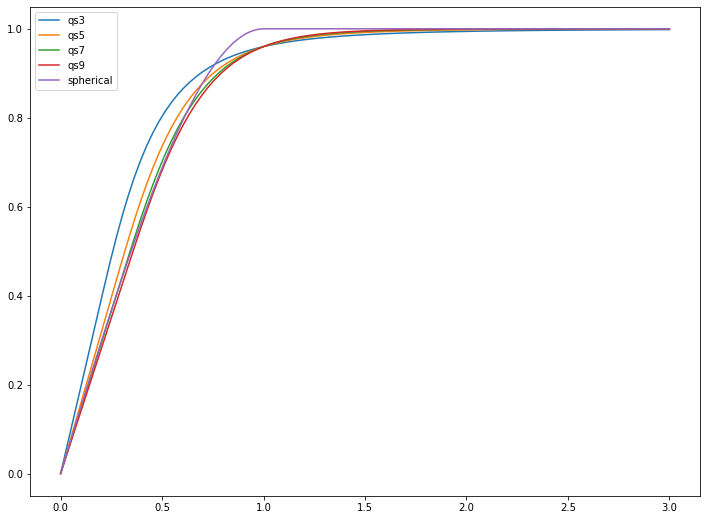

In [3]:
plot_qs(np.linspace(0, 3, 100))

### Around the origin

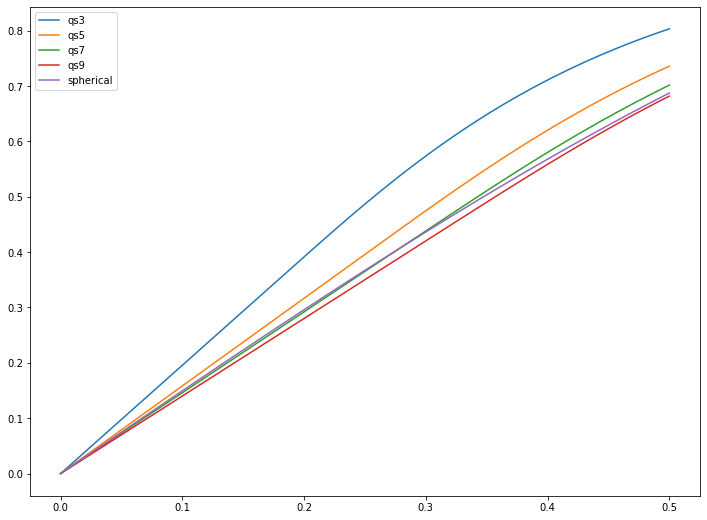

In [4]:
plot_qs(np.linspace(0, 0.5, 100))

### Around the range

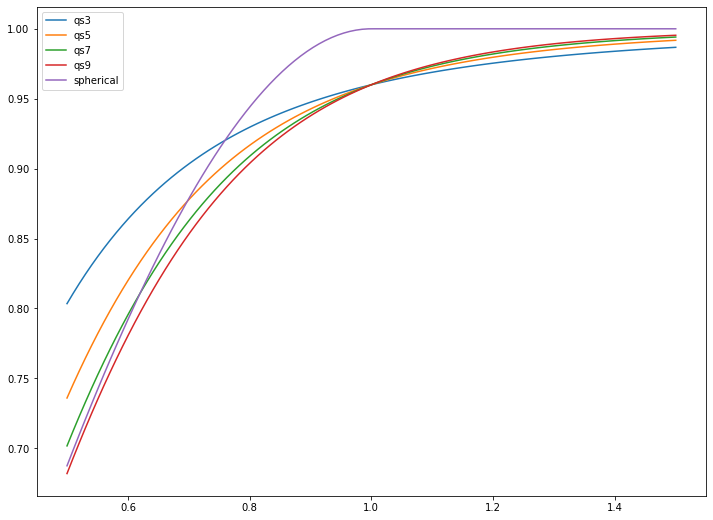

In [5]:
plot_qs(np.linspace(0.5, 1.5, 100))

## References

- Wendland, H. (2004). Scattered Data Approximation. Cambridge University Press. https://doi.org/10.1017/cbo9780511617539